In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_medical=pd.read_csv('medical_raw_data.csv')


In [ ]:
df_medical.head(2)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.40342,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.99812,3,4,3,4,4,4,3,3


In [ ]:
# Make a copy of the data set
df = df_medical.copy()
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [ ]:
# Drop 'Unnamed' column
df = df.drop(df.columns[0], axis = 1)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [ ]:
# Rename last 8 survey columns

df.rename(columns = {'Item1':'Timely admission',
'Item2':'Timely treatment',
'Item3':'Timely visits',
'Item4':'Reliability',
'Item5':'Options',
'Item6':'Hours of treatment',
'Item7':'Courteous',
'Item8':'Listening'},
inplace=True)


In [ ]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Timely admission,Timely treatment,Timely visits,Reliability,Options,Hours of treatment,Courteous,Listening
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [ ]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Timely admission,Timely treatment,Timely visits,Reliability,Options,Hours of treatment,Courteous,Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7412.000000,7586.000000,7536.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.098219,53.295676,40484.438268,19.412675,5.012200,...,5891.538261,12934.528586,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.155427,20.659182,28664.861050,6.723277,1.045734,...,3377.558136,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209690,0.000000,0.000000,18.000000,154.080000,9.519012,1.000000,...,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,35.000000,19450.792500,16.513171,4.000000,...,3253.239465,7986.487642,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33942.280000,18.080560,5.000000,...,5852.250564,11573.979365,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54075.235000,19.789740,6.000000,...,7614.989701,15626.491033,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.130000,53.019124,9.000000,...,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [ ]:
# Find duplicates

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.loc[df.duplicated(), :]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Timely admission,Timely treatment,Timely visits,Reliability,Options,Hours of treatment,Courteous,Listening


In [ ]:
# Rows that containing missing values
df.isnull().any(axis=1)

0        True
1        True
2        True
3        True
4        True
        ...  
9995     True
9996    False
9997     True
9998    False
9999     True
Length: 10000, dtype: bool

In [ ]:
# Columns that contain missing values
df.isna().any()

CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
Timezone              False
Job                   False
Children               True
Age                    True
Education             False
Employment            False
Income                 True
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
VitD_supp             False
Soft_drink             True
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight             True
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain            

In [ ]:
# count toal missing values
df.isna().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                984
A

In [ ]:
# Replace Missing Values with Median (data is skewed)
null_data = df.Children[df.isnull().any(axis=1)]
null_data

0       1.0
1       3.0
2       3.0
3       0.0
4       NaN
       ... 
9986    NaN
9990    0.0
9995    NaN
9997    3.0
9999    8.0
Name: Children, Length: 7687, dtype: float64

In [ ]:
df['Children'] = df['Children'].fillna(df['Children'].median())
df.Children.loc[4:11]

4     1.0
5     1.0
6     0.0
7     7.0
8     1.0
9     2.0
10    4.0
11    1.0
Name: Children, dtype: float64

In [ ]:
null_data = df.Age[df.isnull().any(axis=1)]
null_data

0       53.0
1       51.0
2       53.0
3       78.0
5       76.0
        ... 
9986     NaN
9990     NaN
9995    25.0
9997     NaN
9999     NaN
Name: Age, Length: 6819, dtype: float64

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.Age.loc[9985:9997]

9985    53.0
9986    53.0
9987    44.0
9988    70.0
9989    73.0
9990    53.0
9991    61.0
9992    50.0
9993    83.0
9994    69.0
9995    25.0
9996    87.0
9997    53.0
Name: Age, dtype: float64

In [ ]:
null_data = df.Income[df.isnull().any(axis=1)]
null_data

0       86575.93
1       46805.99
2       14370.14
3       39741.49
5            NaN
          ...   
9980    11519.69
9982         NaN
9990    59914.82
9995    45967.61
9997    65917.81
Name: Income, Length: 5816, dtype: float64

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].median())
df.Income.loc[5:13]

5     33942.28
6     10456.05
7     33942.28
8     55586.48
9     38965.22
10    38503.82
11    14126.30
12    33942.28
13    33942.28
Name: Income, dtype: float64

In [ ]:
null_data = df.Initial_days[df.isnull().any(axis=1)]
null_data

0       10.585770
1       15.129562
2        4.772177
3        1.714879
6        9.058210
          ...    
9980    49.731542
9982    59.408972
9990    62.735993
9995    51.561217
9997          NaN
Name: Initial_days, Length: 4486, dtype: float64

In [ ]:
df['Initial_days'] = df['Initial_days'].fillna(df['Initial_days'].median())
df.Initial_days.loc[49:62]

49    34.446941
50    15.586494
51    12.286799
52    34.446941
53     2.277763
54     2.006912
55     5.053092
56    10.724648
57    34.446941
58     8.298685
59    13.659941
60    23.762227
61     3.683244
62    34.446941
Name: Initial_days, dtype: float64

In [ ]:
df['Soft_drink'] = df['Soft_drink'].replace(np.nan, 0)

In [ ]:
df['Overweight'] = df['Overweight'].replace(np.nan, 0)

In [ ]:
df['Anxiety'] = df['Anxiety'].replace(np.nan, 0)

In [ ]:
df.isna().sum()


CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
Timezone              0
Job                   0
Children              0
Age                   0
Education             0
Employment            0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
VitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days    

In [ ]:
# Finding Outliers

df.describe()[['Children','Age','Income','VitD_levels','Doc_visits','Full_meals_eaten','VitD_supp','Initial_days']]

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Initial_days
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.814000,53.22430,38872.450471,19.412675,5.012200,1.001400,0.398900,34.433651
std,1.916969,17.99382,25042.796229,6.723277,1.045734,1.008117,0.628505,24.860232
min,0.000000,18.00000,154.080000,9.519012,1.000000,0.000000,0.000000,1.001981
25%,1.000000,41.00000,23956.162500,16.513171,4.000000,0.000000,0.000000,8.928987
50%,1.000000,53.00000,33942.280000,18.080560,5.000000,1.000000,0.000000,34.446941
75%,3.000000,65.00000,46466.797500,19.789740,6.000000,2.000000,1.000000,59.459981
max,10.000000,89.00000,207249.130000,53.019124,9.000000,7.000000,5.000000,71.981486


In [ ]:
#Statistical   IQR

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


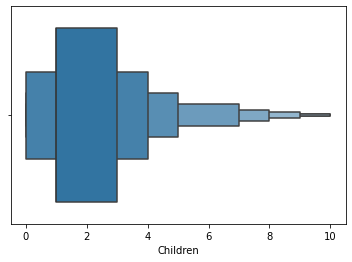

In [ ]:
sns.boxenplot(df['Children'])

In [ ]:
outliers = find_outliers_IQR(df['Children'])

print("number of outliers:"+ str(len(outliers)))

print("max outlier value:"+ str(outliers.max()))

print("min outlier value:"+ str(outliers.min()))

outliers

number of outliers:457
max outlier value:10.0
min outlier value:7.0


7        7.0
16      10.0
46       7.0
65       7.0
79       9.0
        ... 
9834     7.0
9845    10.0
9870     8.0
9918     8.0
9999     8.0
Name: Children, Length: 457, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


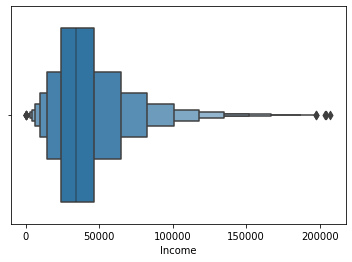

In [ ]:
sns.boxenplot(df['Income'])

In [ ]:
outliers = find_outliers_IQR(df['Income'])

print("number of outliers:"+ str(len(outliers)))

print("max outlier value:"+ str(outliers.max()))

print("min outlier value:"+ str(outliers.min()))

outliers

number of outliers:705
max outlier value:207249.13
min outlier value:80233.66


0        86575.93
15      103866.49
30      167105.10
36      122615.82
50      101159.20
          ...    
9910    119679.13
9929     88732.14
9944     98148.02
9955    122291.51
9986     84593.53
Name: Income, Length: 705, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


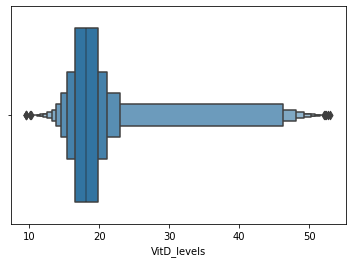

In [ ]:
sns.boxenplot(df['VitD_levels'])

In [ ]:
outliers = find_outliers_IQR(df['VitD_levels'])

print("number of outliers:"+ str(len(outliers)))

print("max outlier value:"+ str(outliers.max()))

print("min outlier value:"+ str(outliers.min()))

outliers

number of outliers:534
max outlier value:53.01912416
min outlier value:9.519011638


11      47.813476
22      25.514635
64      25.268742
91      25.546502
94      49.256313
          ...    
9841    47.899167
9907    51.202138
9929    44.494793
9933    45.440725
9973    47.439599
Name: VitD_levels, Length: 534, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


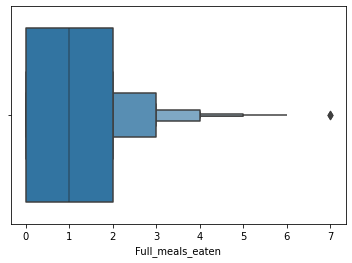

In [ ]:
sns.boxenplot(df['Full_meals_eaten'])

In [ ]:
outliers = find_outliers_IQR(df['Full_meals_eaten'])

print("number of outliers:"+ str(len(outliers)))

print("max outlier value:"+ str(outliers.max()))

print("min outlier value:"+ str(outliers.min()))

outliers

number of outliers:8
max outlier value:7
min outlier value:6


958     7
1231    6
2184    6
4709    7
6068    6
7217    6
8144    6
9986    6
Name: Full_meals_eaten, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


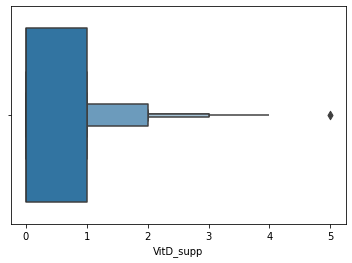

In [ ]:
sns.boxenplot(df['VitD_supp'])

In [ ]:
outliers = find_outliers_IQR(df['VitD_supp'])

print("number of outliers:"+ str(len(outliers)))

print("max outlier value:"+ str(outliers.max()))

print("min outlier value:"+ str(outliers.min()))

outliers

number of outliers:70
max outlier value:5
min outlier value:3


62      3
63      3
206     3
249     3
837     3
       ..
9091    4
9589    3
9790    3
9908    3
9982    3
Name: VitD_supp, Length: 70, dtype: int64

In [ ]:
# Treatment for Outliers (Cap the outlieirs)

upper_limit = round(df['Children'].mean() + 3*df['Children'].std())
print(upper_limit)
lower_limit = round(df['Children'].mean() - 3*df['Children'].std())
print(lower_limit)

8
-4


In [ ]:
df['Children'] = np.where(df['Children'] > upper_limit,
  upper_limit,
  np.where(
  df['Children'] < lower_limit,
  lower_limit,
  df['Children']
  ))

df.describe()[['Children']]



,Children
count,10000.000000
mean,1.793100
std,1.839084
min,0.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,8.000000


In [ ]:
upper_limit = df['Income'].mean() + 3*df['Income'].std()
print(upper_limit)
lower_limit = df['Income'].mean() - 3*df['Income'].std()
print(lower_limit)

114000.83915851757
-36255.9382165219


In [ ]:
df['Income'] = np.where(df['Income'] > upper_limit,
  upper_limit,
  np.where(
  df['Income'] < lower_limit,
  lower_limit,
  df['Income']
  ))

df.describe()[['Income']]

,Income
count,10000.000000
mean,38429.184093
std,23256.708450
min,154.080000
25%,23956.162500
50%,33942.280000
75%,46466.797500
max,114000.839159


In [ ]:
upper_limit = df['VitD_levels'].mean() + 3*df['VitD_levels'].std()
print(upper_limit)
lower_limit = df['VitD_levels'].mean() - 3*df['VitD_levels'].std()
print(lower_limit)

39.582507272004996
-0.7571564807771054


In [ ]:
df['VitD_levels'] = np.where(df['VitD_levels'] > upper_limit,
  upper_limit,
  np.where(
  df['VitD_levels'] < lower_limit,
  lower_limit,
  df['VitD_levels']
  ))

df.describe()[['VitD_levels']]

,VitD_levels
count,10000.000000
mean,19.040352
std,5.198654
min,9.519012
25%,16.513171
50%,18.080560
75%,19.789740
max,39.582507


In [ ]:
upper_limit = round(df['Full_meals_eaten'].mean() + 3*df['Full_meals_eaten'].std())
print(upper_limit)
lower_limit = round(df['Full_meals_eaten'].mean() - 3*df['Full_meals_eaten'].std())
print(lower_limit)

4
-2


In [ ]:
df['Full_meals_eaten'] = np.where(df['Full_meals_eaten'] > upper_limit,
  upper_limit,
  np.where(
  df['Full_meals_eaten'] < lower_limit,
  lower_limit,
  df['Full_meals_eaten']
  ))

df.describe()[['Full_meals_eaten']]

,Full_meals_eaten
count,10000.000000
mean,0.997100
std,0.991862
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


In [ ]:
upper_limit = round(df['VitD_supp'].mean() + 3*df['VitD_supp'].std())
print(upper_limit)
lower_limit = round(df['VitD_supp'].mean() - 3*df['VitD_supp'].std())
print(lower_limit)

2
-1


In [ ]:
df['VitD_supp'] = np.where(df['VitD_supp'] > upper_limit,
  upper_limit,
  np.where(
  df['VitD_supp'] < lower_limit,
  lower_limit,
  df['VitD_supp']
  ))

df.describe()[['VitD_supp']]

,VitD_supp
count,10000.000000
mean,0.391200
std,0.600832
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [ ]:
df.to_csv('df_medical_clean.csv')
